# Módulo 6 aula 3

- Gráfico de barras com df.plot.bar()
- Gráfico de barras com sns.countplot()
- Gráfico de pizza com .plot.pie() do pandas
- Gráfico de pareto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


### Plotagem com o Pandas

In [3]:
df = pd.DataFrame({'col1':[10, 20, 30]}, index = [1, 2, 3])
df

,col1
1,10
2,20
3,30


<Axes: >

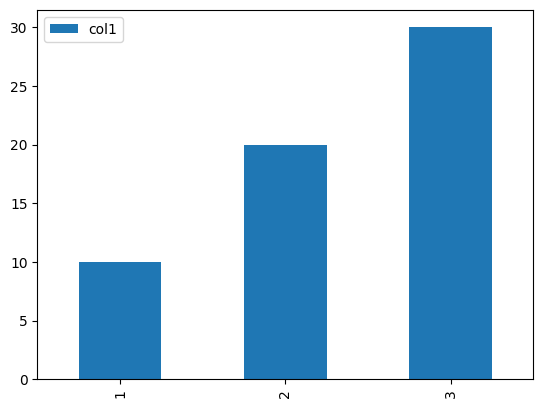

In [4]:
df.plot.bar()

In [5]:
df = pd.DataFrame({'A':[10,15], 'B':[20,25], 'C':[30,35]}, index = [1, 2])
df

,A,B,C
1,10,20,30
2,15,25,35


<Axes: >

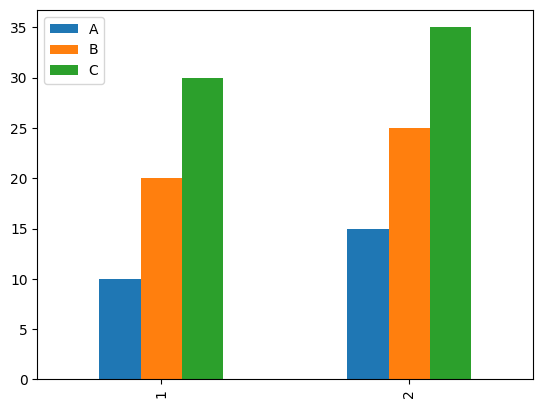

In [6]:
df.plot.bar()


<Axes: >

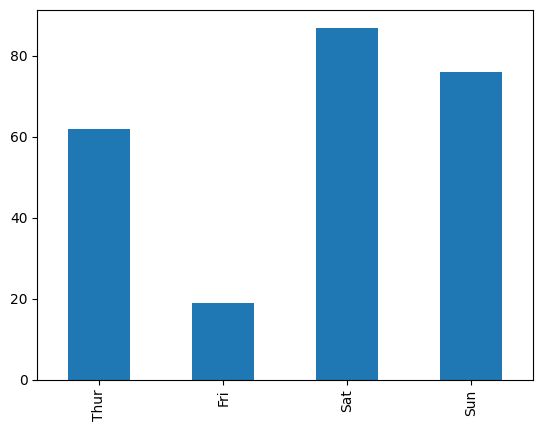

In [13]:
# Em geral precisamos trabalhar a base para fazer o gráfico
tips['day'].value_counts().sort_index().plot.bar()

### Plotagem com o Seaborn

<Axes: xlabel='day', ylabel='count'>

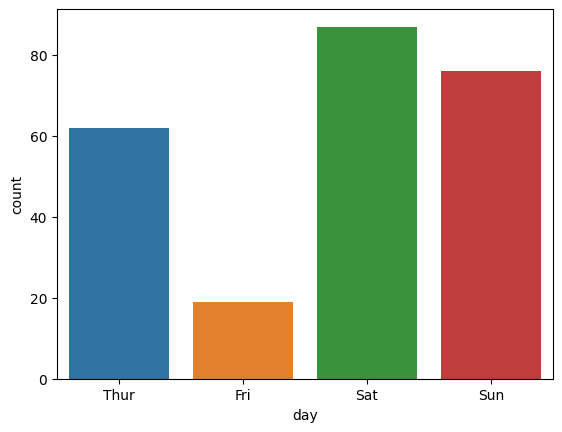

In [14]:
# O Seaborn já faz essa manipulação pra nós
sns.countplot(x='day', data=tips)

<Axes: xlabel='time', ylabel='count'>

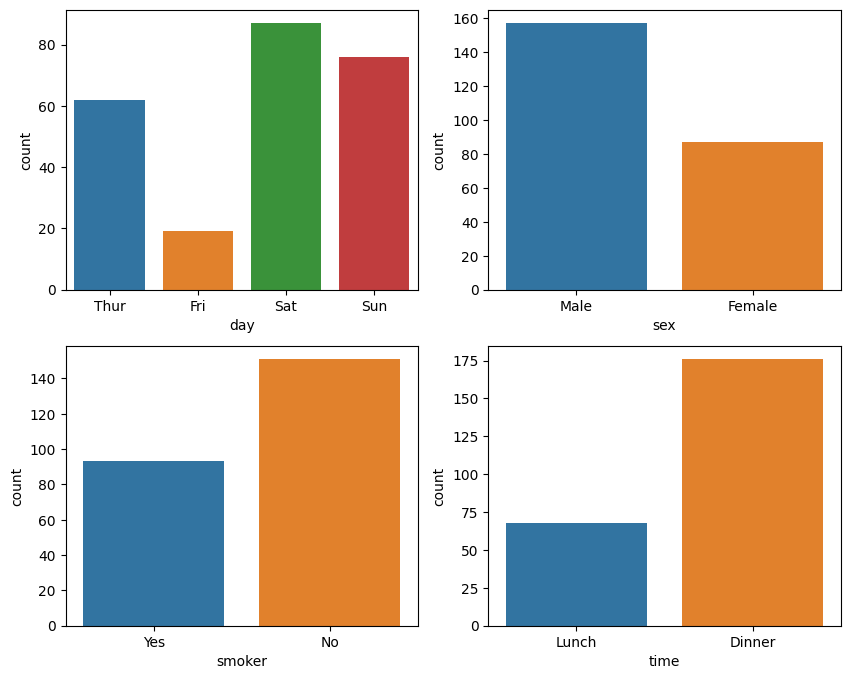

In [16]:
# Os gráficos funcionam dentro da lógica do matplotlib
plt.close('all')
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='day', data=tips)
sns.countplot(ax = axes[0, 1], x='sex', data=tips)
sns.countplot(ax = axes[1, 0], x='smoker', data=tips)
sns.countplot(ax = axes[1, 1], x='time', data=tips)

#ajustar o espaçamento
# plt.subplots_adjust(wspace=0, hspace=0)

<Axes: xlabel='day', ylabel='tip'>

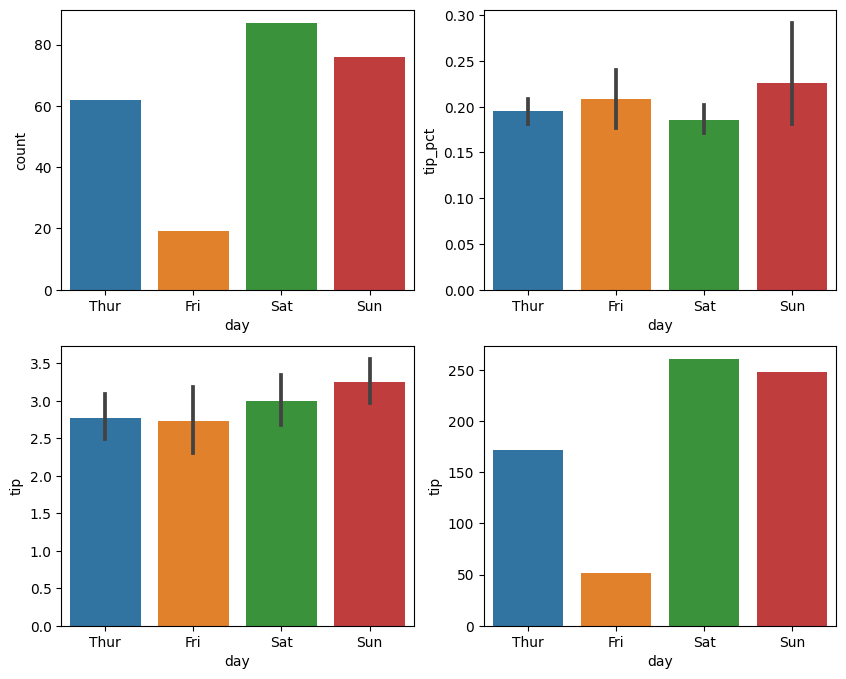

In [18]:
# Você pode também usar o barplot que traz a média da variável y por padrão
plt.close('all')
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0,0], x='day',data=tips)
sns.barplot(ax = axes[0, 1], x='day', y='tip_pct', data=tips)
sns.barplot(ax = axes[1, 0], x='day', y='tip', data=tips)
sns.barplot(ax = axes[1, 1], x='day', y='tip', estimator=sum, data=tips, errorbar = None)

<Axes: ylabel='day'>

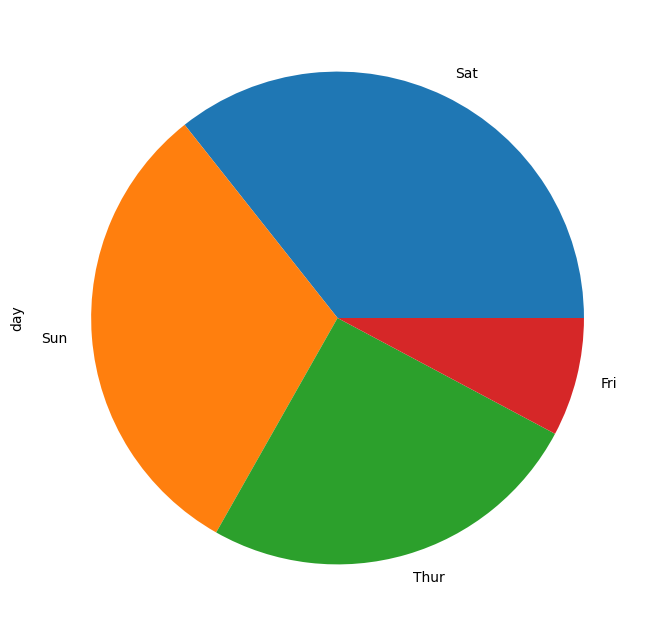

In [19]:
# Se você quiser fazer um gráfico de pizza, pode usar o método .plot.pie do Pandas
tips['day'].value_counts().plot.pie()

In [20]:
# Gráfico de Pareto
from matplotlib.ticker import PercentFormatter

df = pd.DataFrame({'contagem': [43, 20, 174, 5, 2, 1, 1, 0]})
df.index = ['Produto com defeito', 'Produto errado', 'Tempo de entrega',
            'Horário de entrega', 'Mau atendimento', 'Valor errado', 'Não serve', 'Desistência']

df = df.sort_values(by='contagem',ascending=False)
df["pctacum"] = df["contagem"].cumsum()/df["contagem"].sum()*100

df

,contagem,pctacum
Tempo de entrega,174,70.731707
Produto com defeito,43,88.211382
Produto errado,20,96.341463
Horário de entrega,5,98.373984
Mau atendimento,2,99.186992
Valor errado,1,99.593496
Não serve,1,100.000000
Desistência,0,100.000000


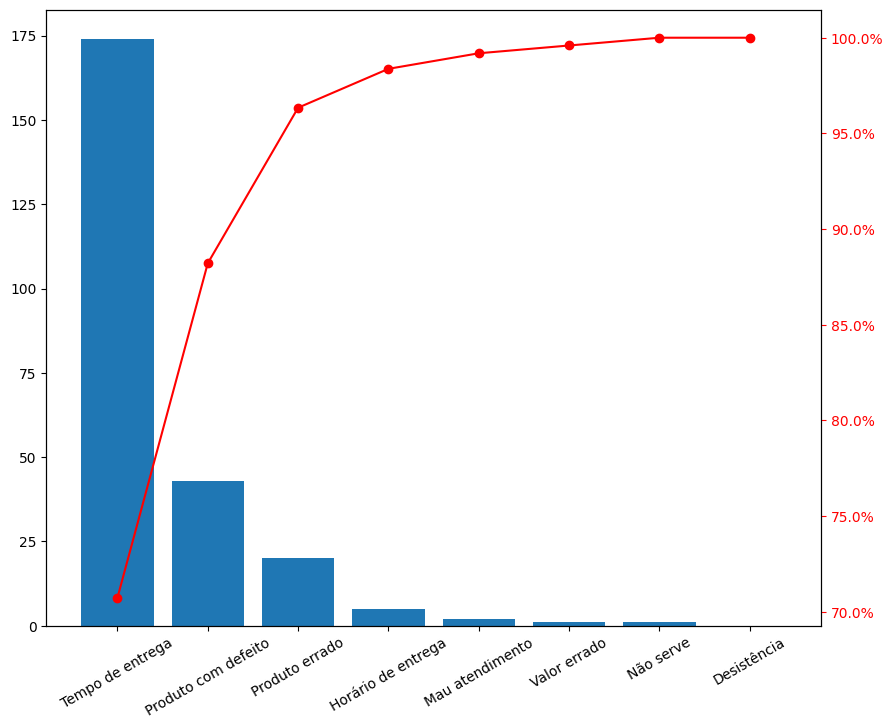

In [21]:
fig, ax = plt.subplots()

ax.bar(df.index, df["contagem"])
ax2 = ax.twinx()
ax2.plot(df.index, df["pctacum"], color="r", marker="o")
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="x", rotation = 30)
ax2.tick_params(axis="y", colors="r")
plt.show()